In [18]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import additionalplot_solution_1, additionalplot_solution_2

We will continue to work with the fuel economy dataset in this workspace.

In [34]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()
fuel_econ.fuelType.unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel',
       'Midgrade Gasoline', 'Natural Gas'], dtype=object)

**Task 1**: Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

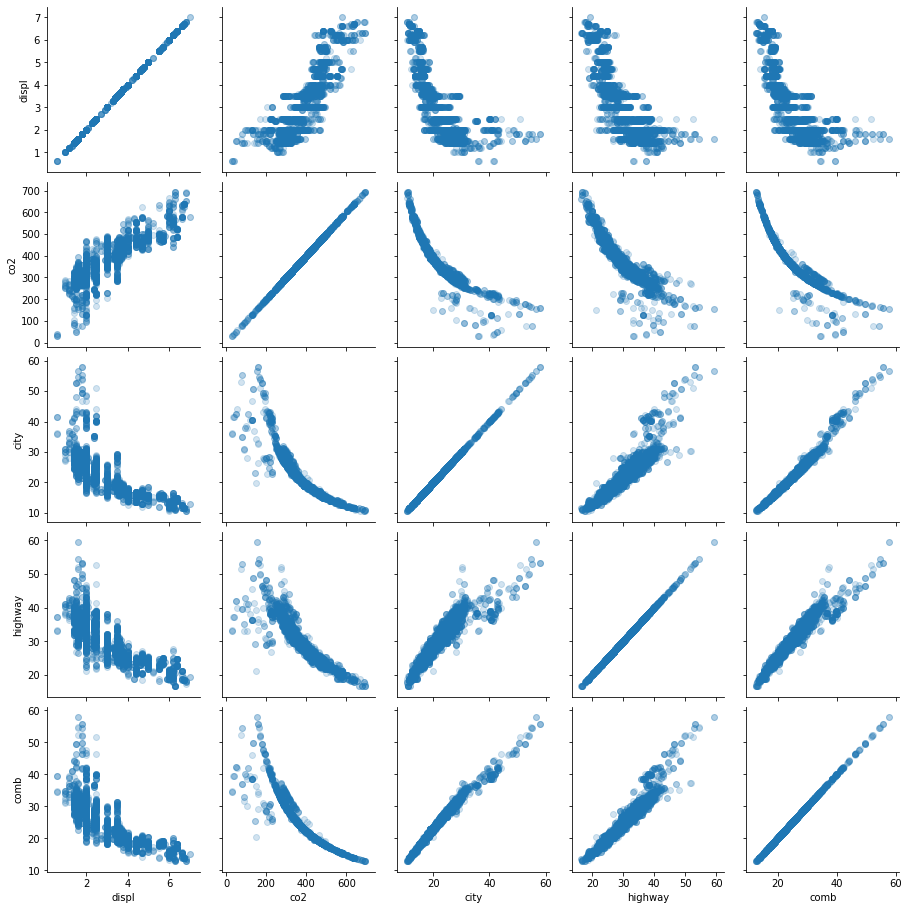

In [26]:
# YOUR CODE HERE
vars = ['displ','co2','city','highway','comb']
g = sb.PairGrid(data= fuel_econ,vars=vars)
g.map(plt.scatter,alpha=1/5)

I set up my PairGrid to plot scatterplots off the diagonal and histograms on the diagonal. The intersections where 'co2' meets the fuel mileage measures are fairly interesting in how tight the curves are. You'll explore this more in the next task.


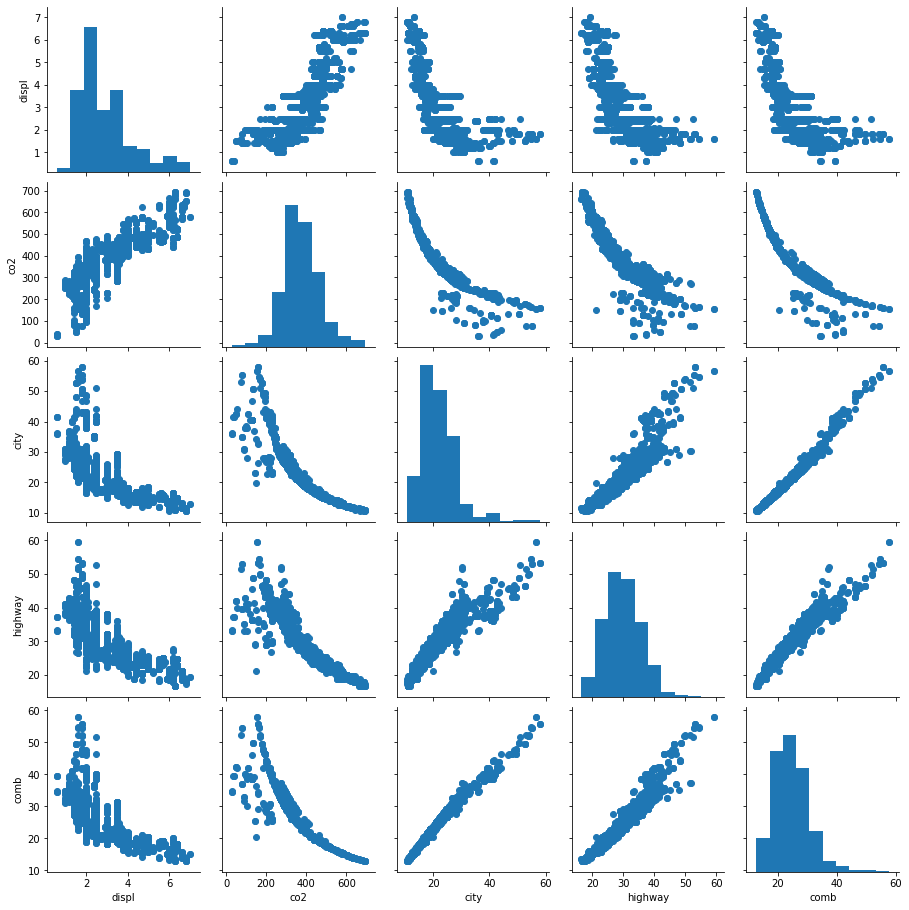

In [21]:
# run this cell to check your work against ours
additionalplot_solution_1()

**Task 2**: The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

In [43]:
fuel_econ['gallons of gas'] = fuel_econ['co2']*fuel_econ['comb']
fuel_econ = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline','Regular Gasoline','Diesel'])]

In [44]:
fuel_econ.columns

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore', 'gallons of gas'],
      dtype='object')

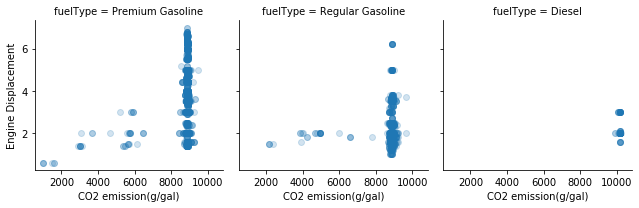

In [56]:
g = sb.FacetGrid(data= fuel_econ,col='fuelType')
g.map(plt.scatter,'gallons of gas','displ',alpha=1/5)
g.set_xlabels('CO2 emission(g/gal)')
g.set_ylabels('Engine Displacement')


Due to the high number of data points and their high amount of overlap, I've chosen to plot the data in a faceted plot. You can see that engine sizes are smaller for cars that use regular gasoline against those that use premium gas. Most cars fall in an emissions band a bit below 9 kg CO2 per gallon; diesel cars are consistently higher, a little above 10 kg CO2 per gallon. This makes sense, since a gallon of gas gets burned no matter how efficient the process. More strikingly, there's a smattering of points with much smaller emissions. If you inspect these points more closely you'll see that they represent hybrid cars that use battery energy in addition to conventional fuel! To pull these mechanically out of the dataset requires more data than that which was trimmed to create it - and additional research to understand why these points don't fit the normal CO2 bands.


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


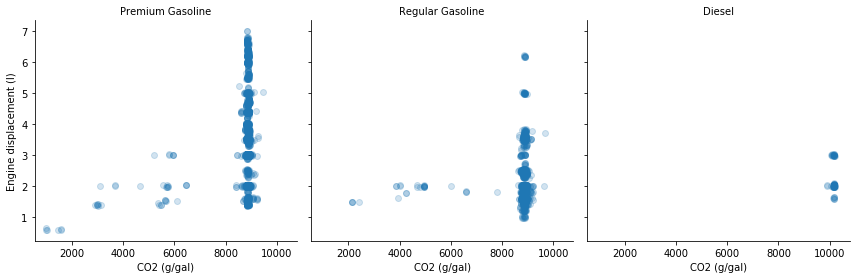

In [25]:
# run this cell to check your work against ours
additionalplot_solution_2()